https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/
    
https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664?gi=a417dc3c0200

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import yfinance as yf


In [2]:
news = pd.read_csv('analyst_ratings_processed.csv')

In [3]:
news.head()

,Unnamed: 0,title,date,stock
0,0.0,Stocks That Hit 52-Week Highs On Friday,2020-06-05 10:30:00-04:00,A
1,1.0,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03 10:45:00-04:00,A
2,2.0,71 Biggest Movers From Friday,2020-05-26 04:30:00-04:00,A
3,3.0,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22 12:45:00-04:00,A
4,4.0,B of A Securities Maintains Neutral on Agilent...,2020-05-22 11:38:00-04:00,A


In [4]:
news['stock'].value_counts()

MRK     3334
MS      3242
MU      3144
NVDA    3133
QQQ     3100
        ... 
CADT       1
PRY        1
GSY        1
JJM        1
VOOG       1
Name: stock, Length: 6192, dtype: int64

In [5]:
TSLA = news[news['stock']=='TSLA']
TSLA = TSLA.reset_index(drop=True)

In [6]:
dropped = ['Unnamed: 0','stock']
TSLA.drop(dropped,axis = 1,inplace = True)

TSLA

,title,date
0,Tesla's Stock Closes At All-Time High As Musk ...,2020-06-10 17:02:00-04:00
1,'Tesla factory workplace safety is 5% better t...,2020-06-10 15:08:00-04:00
2,'Tesla hacker unlocks Performance upgrade and ...,2020-06-10 12:41:00-04:00
3,GM On Track To Spend $20B On EV And AV Develop...,2020-06-10 11:33:00-04:00
4,"Tesla's Journey To $1,000 In 2020",2020-06-10 10:15:00-04:00
...,...,...
1925,Electrek.Co Tweet: Tesla's head of Europe is out,2019-07-02 06:09:00-04:00
1926,Tesla's Q2 Delivery Number Could Cause A Big Move,2019-07-01 14:56:00-04:00
1927,'Tesla Electric Airplane? Elon Musk sees elect...,2019-07-01 12:17:00-04:00
1928,"UPDATE: JMP Reiterates Outperform, $347 Target...",2019-07-01 11:41:00-04:00


In [7]:
order = ['date','title']
TSLA = TSLA[order]
TSLA

,date,title
0,2020-06-10 17:02:00-04:00,Tesla's Stock Closes At All-Time High As Musk ...
1,2020-06-10 15:08:00-04:00,'Tesla factory workplace safety is 5% better t...
2,2020-06-10 12:41:00-04:00,'Tesla hacker unlocks Performance upgrade and ...
3,2020-06-10 11:33:00-04:00,GM On Track To Spend $20B On EV And AV Develop...
4,2020-06-10 10:15:00-04:00,"Tesla's Journey To $1,000 In 2020"
...,...,...
1925,2019-07-02 06:09:00-04:00,Electrek.Co Tweet: Tesla's head of Europe is out
1926,2019-07-01 14:56:00-04:00,Tesla's Q2 Delivery Number Could Cause A Big Move
1927,2019-07-01 12:17:00-04:00,'Tesla Electric Airplane? Elon Musk sees elect...
1928,2019-07-01 11:41:00-04:00,"UPDATE: JMP Reiterates Outperform, $347 Target..."


In [8]:
TSLA.dtypes

date     object
title    object
dtype: object

In [9]:
TSLA.isnull().sum()

date     0
title    0
dtype: int64

In [10]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1930 non-null   object
 1   title   1930 non-null   object
dtypes: object(2)
memory usage: 30.3+ KB


In [11]:
#Adjust date info
TSLA['date'] = pd.to_datetime(TSLA['date'],utc = True)

In [12]:
TSLA['date'] = TSLA['date'].dt.date
TSLA

,date,title
0,2020-06-10,Tesla's Stock Closes At All-Time High As Musk ...
1,2020-06-10,'Tesla factory workplace safety is 5% better t...
2,2020-06-10,'Tesla hacker unlocks Performance upgrade and ...
3,2020-06-10,GM On Track To Spend $20B On EV And AV Develop...
4,2020-06-10,"Tesla's Journey To $1,000 In 2020"
...,...,...
1925,2019-07-02,Electrek.Co Tweet: Tesla's head of Europe is out
1926,2019-07-01,Tesla's Q2 Delivery Number Could Cause A Big Move
1927,2019-07-01,'Tesla Electric Airplane? Elon Musk sees elect...
1928,2019-07-01,"UPDATE: JMP Reiterates Outperform, $347 Target..."


In [13]:
TSLA = TSLA.groupby(['date'])['title'].apply(lambda x: ','.join(x)).reset_index()
TSLA

,date,title
0,2019-07-01,Tesla's Q2 Delivery Number Could Cause A Big M...
1,2019-07-02,"Tesla, Unum Therapeutics Making Big Moves In T..."
2,2019-07-03,Big Tesla Options Trades Could Signal Institut...
3,2019-07-05,'Tesla reduces the price of its solar systems'...
4,2019-07-06,"Barron's Picks And Pans: Coca-Cola, Kroger, Sh..."
...,...,...
280,2020-06-05,"ESPAÑOL • Cannabis en Argentina, Blockchain Ur..."
281,2020-06-06,"Bulls And Bears Of The Week: Gilead, Shopify, ..."
282,2020-06-08,"NASDAQ Closes At All-Time High,Why Nikola's St..."
283,2020-06-09,"Volkswagen Cuts Costs, Targets Electric Future..."


In [14]:
TSLA.set_index('date', inplace= True)
TSLA

,title
date,
2019-07-01,Tesla's Q2 Delivery Number Could Cause A Big M...
2019-07-02,"Tesla, Unum Therapeutics Making Big Moves In T..."
2019-07-03,Big Tesla Options Trades Could Signal Institut...
2019-07-05,'Tesla reduces the price of its solar systems'...
2019-07-06,"Barron's Picks And Pans: Coca-Cola, Kroger, Sh..."
...,...
2020-06-05,"ESPAÑOL • Cannabis en Argentina, Blockchain Ur..."
2020-06-06,"Bulls And Bears Of The Week: Gilead, Shopify, ..."
2020-06-08,"NASDAQ Closes At All-Time High,Why Nikola's St..."


In [15]:
TSLA = TSLA.sort_index(ascending = True,axis = 0)

In [16]:
TSLA

,title
date,
2019-07-01,Tesla's Q2 Delivery Number Could Cause A Big M...
2019-07-02,"Tesla, Unum Therapeutics Making Big Moves In T..."
2019-07-03,Big Tesla Options Trades Could Signal Institut...
2019-07-05,'Tesla reduces the price of its solar systems'...
2019-07-06,"Barron's Picks And Pans: Coca-Cola, Kroger, Sh..."
...,...
2020-06-05,"ESPAÑOL • Cannabis en Argentina, Blockchain Ur..."
2020-06-06,"Bulls And Bears Of The Week: Gilead, Shopify, ..."
2020-06-08,"NASDAQ Closes At All-Time High,Why Nikola's St..."


In [17]:
TSLA.isnull().sum()

title    0
dtype: int64

In [18]:
#Part 2

In [19]:
TSLA_S = yf.Ticker('TSLA')
TSLA_S

yfinance.Ticker object <TSLA>

In [20]:
hist = TSLA_S.history(start = '2019-07-01', end = '2020-06-10' )
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-07-01,46.042000,46.619999,45.256001,45.433998,41067000,0,0
2019-07-02,45.778000,45.830002,44.444000,44.910000,46295000,0,0
2019-07-03,47.877998,48.313999,46.902000,46.980000,71005500,0,0
2019-07-05,46.914001,47.090000,46.160000,46.619999,35328500,0,0
2019-07-08,46.248001,46.450001,45.731998,46.068001,29402500,0,0
...,...,...,...,...,...,...,...
2020-06-03,177.623993,179.587997,176.020004,176.591995,39747500,0,0
2020-06-04,177.975998,179.149994,171.688004,172.876007,44438500,0,0
2020-06-05,175.567993,177.304001,173.240005,177.132004,39059500,0,0


In [21]:
dropped = ['Dividends','Stock Splits']
hist.drop(dropped,axis = 1,inplace = True)
hist

,Open,High,Low,Close,Volume
Date,,,,,
2019-07-01,46.042000,46.619999,45.256001,45.433998,41067000
2019-07-02,45.778000,45.830002,44.444000,44.910000,46295000
2019-07-03,47.877998,48.313999,46.902000,46.980000,71005500
2019-07-05,46.914001,47.090000,46.160000,46.619999,35328500
2019-07-08,46.248001,46.450001,45.731998,46.068001,29402500
...,...,...,...,...,...
2020-06-03,177.623993,179.587997,176.020004,176.591995,39747500
2020-06-04,177.975998,179.149994,171.688004,172.876007,44438500
2020-06-05,175.567993,177.304001,173.240005,177.132004,39059500


In [22]:
hist.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [23]:
#Combine
TSLA_C = pd.concat([hist,TSLA],axis = 1,)
TSLA_C.isnull().sum()

Open      51
High      51
Low       51
Close     51
Volume    51
title      4
dtype: int64

In [24]:
TSLA_C.dropna(axis = 0,inplace = True)
TSLA_C.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
title     0
dtype: int64

In [25]:
TSLA_C

,Open,High,Low,Close,Volume,title
2019-07-01,46.042000,46.619999,45.256001,45.433998,41067000.0,Tesla's Q2 Delivery Number Could Cause A Big M...
2019-07-02,45.778000,45.830002,44.444000,44.910000,46295000.0,"Tesla, Unum Therapeutics Making Big Moves In T..."
2019-07-03,47.877998,48.313999,46.902000,46.980000,71005500.0,Big Tesla Options Trades Could Signal Institut...
2019-07-05,46.914001,47.090000,46.160000,46.619999,35328500.0,'Tesla reduces the price of its solar systems'...
2019-07-08,46.248001,46.450001,45.731998,46.068001,29402500.0,"Investor Movement Index Summary: June 2019,Ind..."
...,...,...,...,...,...,...
2020-06-03,177.623993,179.587997,176.020004,176.591995,39747500.0,'Tesla announces massive Supercharger expansio...
2020-06-04,177.975998,179.149994,171.688004,172.876007,44438500.0,What Elon Musk Thinks About Amazon: 'Monopolie...
2020-06-05,175.567993,177.304001,173.240005,177.132004,39059500.0,"ESPAÑOL • Cannabis en Argentina, Blockchain Ur..."
2020-06-08,183.800003,190.000000,181.832001,189.983994,70873500.0,"NASDAQ Closes At All-Time High,Why Nikola's St..."


In [26]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Vipul
[nltk_data]     Dass\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [28]:
TSLA_C['sentiment_compound'] = TSLA_C['title'].apply(lambda x: sid.polarity_scores(x)['compound'])
#TSLA_C['sentiment_positive'] = TSLA_C['title'].apply(lambda x: sid.polarity_scores(x)['pos'])
#TSLA_C['sentiment_negative'] = TSLA_C['title'].apply(lambda x: sid.polarity_scores(x)['neg'])
#TSLA_C['sentiment_neutral'] = TSLA_C['title'].apply(lambda x: sid.polarity_scores(x)['neu'])
TSLA_C.drop('title',axis = 1,inplace = True)
TSLA_C

,Open,High,Low,Close,Volume,sentiment_compound
2019-07-01,46.042000,46.619999,45.256001,45.433998,41067000.0,0.4939
2019-07-02,45.778000,45.830002,44.444000,44.910000,46295000.0,0.3182
2019-07-03,47.877998,48.313999,46.902000,46.980000,71005500.0,0.9081
2019-07-05,46.914001,47.090000,46.160000,46.619999,35328500.0,0.2023
2019-07-08,46.248001,46.450001,45.731998,46.068001,29402500.0,0.1027
...,...,...,...,...,...,...
2020-06-03,177.623993,179.587997,176.020004,176.591995,39747500.0,0.4939
2020-06-04,177.975998,179.149994,171.688004,172.876007,44438500.0,0.2924
2020-06-05,175.567993,177.304001,173.240005,177.132004,39059500.0,0.4404
2020-06-08,183.800003,190.000000,181.832001,189.983994,70873500.0,0.9393


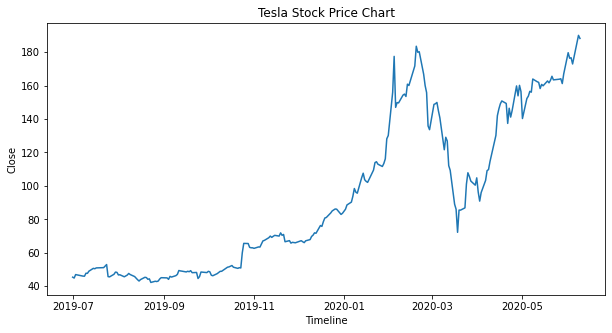

In [30]:
plt.figure(figsize = (10,5))
plt.xlabel('Timeline')
plt.title('Tesla Stock Price Chart')
sns.lineplot(data = TSLA_C['Close'])
plt.show()


In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [32]:
count = TSLA_C.shape[0]
count

234

In [33]:
train = TSLA_C[0:int(count*0.8)]
test = TSLA_C[0:(234-int(count*0.8))]
test

,Open,High,Low,Close,Volume,sentiment_compound
2019-07-01,46.042000,46.619999,45.256001,45.433998,41067000.0,0.4939
2019-07-02,45.778000,45.830002,44.444000,44.910000,46295000.0,0.3182
2019-07-03,47.877998,48.313999,46.902000,46.980000,71005500.0,0.9081
2019-07-05,46.914001,47.090000,46.160000,46.619999,35328500.0,0.2023
2019-07-08,46.248001,46.450001,45.731998,46.068001,29402500.0,0.1027
2019-07-09,45.793999,46.200001,45.456001,46.012001,30954000.0,0.9042
2019-07-10,46.830002,47.787998,46.627998,47.784000,45728500.0,0.5267
2019-07-11,47.627998,48.299999,47.160000,47.720001,37572000.0,0.5423
2019-07-12,47.950001,49.076000,47.942001,49.015999,46002500.0,0.5267
2019-07-15,49.599998,50.883999,48.972000,50.700001,55000500.0,0.3595


In [34]:
closing_pred = pd.DataFrame(test['Close'])


,Close
2019-07-01,45.433998
2019-07-02,44.910000
2019-07-03,46.980000
2019-07-05,46.619999
2019-07-08,46.068001
2019-07-09,46.012001
2019-07-10,47.784000
2019-07-11,47.720001
2019-07-12,49.015999
2019-07-15,50.700001


In [35]:
features = ['Open','High','Low','sentiment_compound']
train_inputs,train_targets = train[features].astype(np.float),train['Close'].astype(np.float)
test_inputs,test_targets = test[features].astype(np.float),test['Close'].astype(np.float)

In [36]:
train_inputs = train_inputs.to_numpy()
test_inputs = test_inputs.to_numpy()

In [37]:
train_inputs.shape

(187, 4)

In [38]:
train_inputs = np.reshape(train_inputs, (train_inputs.shape[0],train_inputs.shape[1],1))

In [39]:
hidden_layer_size = 50
model = Sequential()

model.add(LSTM(hidden_layer_size,return_sequences = True,input_shape=(train_inputs.shape[1],1)))
          
model.add(LSTM(units=50))
model.add(Dense(1))          

In [40]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [41]:
model.fit(train_inputs, train_targets, epochs=1, batch_size=1, verbose=1)

187/187 [==============================] - 4s 3ms/step - loss: 6930.3520 - accuracy: 0.0000e+00


In [42]:
test_inputs = np.reshape(test_inputs, (test_inputs.shape[0],test_inputs.shape[1],1))

In [43]:
closing_price = model.predict(test_inputs)

In [44]:
closing_price

array([[18.348043],
       [18.34803 ],
       [18.348228],
       [18.34812 ],
       [18.34805 ],
       [18.34802 ],
       [18.348103],
       [18.348183],
       [18.348192],
       [18.34834 ],
       [18.348345],
       [18.34843 ],
       [18.348513],
       [18.348457],
       [18.348507],
       [18.34814 ],
       [18.347988],
       [18.347958],
       [18.348055],
       [18.348269],
       [18.348303],
       [18.348045],
       [18.348032],
       [18.348074],
       [18.347954],
       [18.348112],
       [18.348131],
       [18.348063],
       [18.3481  ],
       [18.347881],
       [18.347721],
       [18.347925],
       [18.348001],
       [18.347849],
       [18.347904],
       [18.347826],
       [18.34766 ],
       [18.347738],
       [18.347658],
       [18.34778 ],
       [18.34804 ],
       [18.347904],
       [18.347998],
       [18.347847],
       [18.347977],
       [18.34801 ],
       [18.348042]], dtype=float32)

In [45]:
closing_pred['Predicted_Close'] = closing_price
closing_pred

,Close,Predicted_Close
2019-07-01,45.433998,18.348043
2019-07-02,44.910000,18.348030
2019-07-03,46.980000,18.348228
2019-07-05,46.619999,18.348120
2019-07-08,46.068001,18.348049
2019-07-09,46.012001,18.348021
2019-07-10,47.784000,18.348103
2019-07-11,47.720001,18.348183
2019-07-12,49.015999,18.348192
2019-07-15,50.700001,18.348339


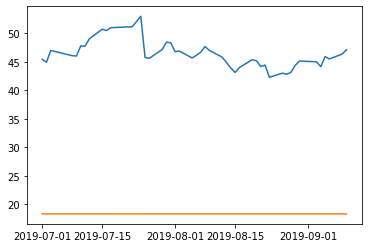

In [46]:

plt.plot(closing_pred['Close'])
plt.plot(closing_pred['Predicted_Close'])